In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols      
from statsmodels.stats.anova import _get_covariance,anova_lm 
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

In [26]:
df=pd.read_csv('SalaryData.csv')

In [27]:
df.head(9)

,Education,Occupation,Salary
0,Doctorate,Adm-clerical,153197
1,Doctorate,Adm-clerical,115945
2,Doctorate,Adm-clerical,175935
3,Doctorate,Adm-clerical,220754
4,Doctorate,Sales,170769
5,Doctorate,Sales,219420
6,Doctorate,Sales,237920
7,Doctorate,Sales,160540
8,Doctorate,Sales,180934


In [28]:
df.shape

(40, 3)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Education   40 non-null     object
 1   Occupation  40 non-null     object
 2   Salary      40 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ KB


In [30]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Education,40,3,Doctorate,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,40,4,Prof-specialty,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,40.0,NaN,NaN,NaN,162186.875,64860.407506,50103.0,99897.5,169100.0,214440.75,260151.0


In [31]:
df.Education.value_counts()     

 Doctorate    16
 Bachelors    15
 HS-grad       9
Name: Education, dtype: int64

In [32]:
df.Occupation.value_counts()

 Prof-specialty     13
 Sales              12
 Adm-clerical       10
 Exec-managerial     5
Name: Occupation, dtype: int64

In [33]:
df['Salary'].min()

50103

In [34]:
df['Salary'].max()

260151

## -------------------------------------------------------------------------------------------------------------------------------------

### One Way Anova

## -------------------------------------------------------------------------------------------------------------------------------------

### Formulate the Null and Alternate Hypothesis  (Salary and Educational qualification)

**Null Hypothesis $H_0$ : The mean salary of individual is same with different categories of educational qualification**

**Alternate Hypothesis $H_A$ : The mean salary of individual is different in at-least one category of educational qualification**


In [35]:
formula_1 = 'Salary ~ C(Education)'
model_1 = ols(formula_1, df).fit() 
aov_table_1 = anova_lm(model_1)
print(aov_table_1)

                df        sum_sq       mean_sq         F        PR(>F)
C(Education)   2.0  1.026955e+11  5.134773e+10  30.95628  1.257709e-08
Residual      37.0  6.137256e+10  1.658718e+09       NaN           NaN


**Conclusion: Since the p value is less than the significance level (0.05), we can reject the null hypothesis and conclude that there is a difference in the mean salary of individual in at-least one category of educational qualification**

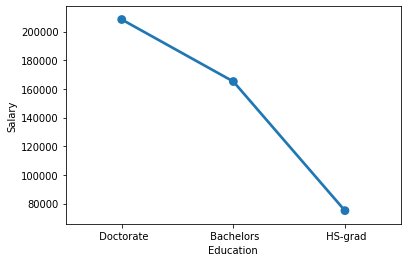

In [36]:
sns.pointplot(x= 'Education', y= 'Salary', data= df, ci= None)

## -------------------------------------------------------------------------------------------------------------------------------------

### Formulate the Null and Alternate Hypothesis  (Salary and Occupation)

**Null Hypothesis $H_0$ : The mean salary of individual is same with different categories of occupation**

**Alternate Hypothesis $H_A$ : The mean salary of individual is different in at-least one category of occupation**


In [37]:
formula_2 = 'Salary ~ Occupation'
model_2 = ols(formula_2, df).fit() 
aov_table_2 = anova_lm(model_2)
print(aov_table_2)

              df        sum_sq       mean_sq         F    PR(>F)
Occupation   3.0  1.125878e+10  3.752928e+09  0.884144  0.458508
Residual    36.0  1.528092e+11  4.244701e+09       NaN       NaN


**Conclusion: Since the p value is greater than the significance level (0.05), we fail to reject the null hypothesis and conclude that there is a no difference in the mean salary of individual with respect to different categories of occupation**

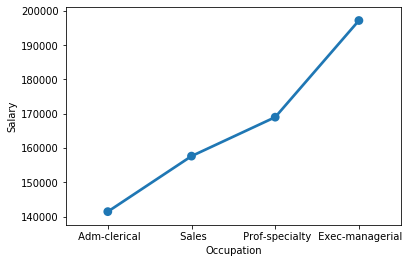

In [38]:
sns.pointplot(x= 'Occupation', y= 'Salary', data= df, ci= None)

## -------------------------------------------------------------------------------------------------------------------------------------

In [39]:
#adding the Tukey HSD to understand where is the difference? It's basically t-test between each of the combinations
#Tukey HSD - Honest Significant Difference 

In [40]:
compare_1= MultiComparison(df['Salary'], df['Education'])
result_1= compare_1.tukeyhsd()
print(result_1)

           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
  group1     group2     meandiff   p-adj     lower        upper    reject
-------------------------------------------------------------------------
 Bachelors  Doctorate   43274.0667 0.0146    7541.1439  79006.9894   True
 Bachelors    HS-grad  -90114.1556  0.001 -132035.1958 -48193.1153   True
 Doctorate    HS-grad -133388.2222  0.001 -174815.0876 -91961.3569   True
-------------------------------------------------------------------------


In [41]:
compare_2= MultiComparison(df['Salary'], df['Occupation'])
result_2= compare_2.tukeyhsd()
print(result_2)

                Multiple Comparison of Means - Tukey HSD, FWER=0.05                 
     group1           group2        meandiff  p-adj     lower        upper    reject
------------------------------------------------------------------------------------
    Adm-clerical  Exec-managerial     55693.3 0.4146  -40415.1459 151801.7459  False
    Adm-clerical   Prof-specialty  27528.8538 0.7252  -46277.4011 101335.1088  False
    Adm-clerical            Sales  16180.1167    0.9  -58951.3115  91311.5449  False
 Exec-managerial   Prof-specialty -28164.4462 0.8263 -120502.4542  64173.5618  False
 Exec-managerial            Sales -39513.1833 0.6507 -132913.8041  53887.4374  False
  Prof-specialty            Sales -11348.7372    0.9  -81592.6398  58895.1655  False
------------------------------------------------------------------------------------


## -------------------------------------------------------------------------------------------------------------------------------------

### Interaction plot

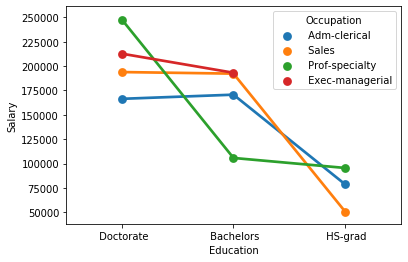

In [42]:
sns.pointplot(x='Education', y='Salary', data=df, hue='Occupation',ci=None);

## -------------------------------------------------------------------------------------------------------------------------------------

### Two Way Anova

## -------------------------------------------------------------------------------------------------------------------------------------

In [43]:
formula = 'Salary ~ C(Education) + C(Occupation)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
(aov_table)

,df,sum_sq,mean_sq,F,PR(>F)
C(Education),2.0,1.026955e+11,5.134773e+10,31.257677,1.981539e-08
C(Occupation),3.0,5.519946e+09,1.839982e+09,1.120080,3.545825e-01
Residual,34.0,5.585261e+10,1.642724e+09,NaN,NaN


In [44]:
formula2 = 'Salary ~ C(Occupation)+ C(Education)'
model2 = ols(formula2, df).fit()
aov_table = anova_lm(model2)
(aov_table)

,df,sum_sq,mean_sq,F,PR(>F)
C(Occupation),3.0,1.125878e+10,3.752928e+09,2.284576,9.648715e-02
C(Education),2.0,9.695663e+10,4.847831e+10,29.510933,3.708479e-08
Residual,34.0,5.585261e+10,1.642724e+09,NaN,NaN


In [45]:
formula = 'Salary ~ C(Education) + C(Occupation) + C(Education):C(Occupation)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
(aov_table)

,df,sum_sq,mean_sq,F,PR(>F)
C(Education),2.0,1.026955e+11,5.134773e+10,72.211958,5.466264e-12
C(Occupation),3.0,5.519946e+09,1.839982e+09,2.587626,7.211580e-02
C(Education):C(Occupation),6.0,3.634909e+10,6.058182e+09,8.519815,2.232500e-05
Residual,29.0,2.062102e+10,7.110697e+08,NaN,NaN


## -------------------------------------------------------------------------------------------------------------------------------------